In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as mtrans
from collections import defaultdict
from itertools import chain

df = pd.read_csv(
    './data/Post-COVID_Conditions_20240330.csv',
    dtype={'Phase': str},
    parse_dates=['Time Period Start Date', 'Time Period End Date'],
    index_col=['Phase', 'Group', 'Subgroup']
)
                 
df.index.drop_duplicates().to_list()


[('3.5', 'National Estimate', 'United States'),
 ('3.5', 'By Age', '18 - 29 years'),
 ('3.5', 'By Age', '30 - 39 years'),
 ('3.5', 'By Age', '40 - 49 years'),
 ('3.5', 'By Age', '50 - 59 years'),
 ('3.5', 'By Age', '60 - 69 years'),
 ('3.5', 'By Age', '70 - 79 years'),
 ('3.5', 'By Age', '80 years and above'),
 ('3.5', 'By Sex', 'Male'),
 ('3.5', 'By Sex', 'Female'),
 ('3.5', 'By Gender identity', 'Cis-gender male'),
 ('3.5', 'By Gender identity', 'Cis-gender female'),
 ('3.5', 'By Gender identity', 'Transgender'),
 ('3.5', 'By Sexual orientation', 'Gay or lesbian'),
 ('3.5', 'By Sexual orientation', 'Straight'),
 ('3.5', 'By Sexual orientation', 'Bisexual'),
 ('3.5', 'By Race/Hispanic ethnicity', 'Hispanic or Latino'),
 ('3.5', 'By Race/Hispanic ethnicity', 'Non-Hispanic White, single race'),
 ('3.5', 'By Race/Hispanic ethnicity', 'Non-Hispanic Black, single race'),
 ('3.5', 'By Race/Hispanic ethnicity', 'Non-Hispanic Asian, single race'),
 ('3.5',
  'By Race/Hispanic ethnicity',
  'N

dict_keys([47.0, 50.0, 53.0, 56.0, 59.0, 62.0, 64.5])


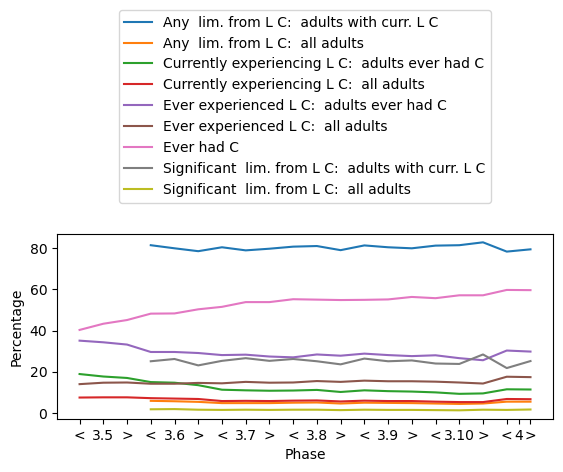

In [154]:
natl_df = df.loc[(slice(None), 'National Estimate', 'United States')].reset_index()
natl_df.loc[natl_df['Phase'] == '3.1', 'Phase'] = '3.10'
period_to_phase = natl_df[['Time Period', 'Phase']].set_index('Time Period').to_dict()['Phase']
phase_to_period = defaultdict(list)
for period, phase in period_to_phase.items():
    if period == 1:
        continue
    phase_to_period[phase].append(period)

phase_midpoint_labels = {
    0.5 * (min(periods) + max(periods)) : phase
    for phase, periods in phase_to_period.items()
}
print(phase_midpoint_labels.keys())
natl_indicators = (
    natl_df.query('`Time Period` != 1').set_index(['Time Period', 'Indicator'])
           .loc[:, ['Value']].unstack('Indicator')              
)    
fig, ax = plt.subplots()
def shorten(st):
    st = st.replace('long', 'L')
    st = st.replace('COVID', 'C')
    st = st.replace('activity limitations', ' lim.')
    st = st.replace(', as a percentage of', ': ')
    st = st.replace('who currently have', 'with curr.')
    st = st.replace('who ever had', 'ever had')
    return st

labels = [shorten(col[1]) for col in natl_indicators.columns]
for col, lab in zip(natl_indicators.columns, labels):
    ax.plot(natl_indicators.index, natl_indicators[col], label=lab)
ax.set_xlabel('Phase')
ax.set_ylabel('Percentage')
ax.set_xticks([])
xticks = [[min(periods), 0.5 * (min(periods) + max(periods)), max(periods)]
           for periods in  phase_to_period.values()]
xticklabels = [['<', phase, '>'] for phase in phase_to_period.keys()]
ax.set_xticks(list(chain.from_iterable(xticks)))
ax.set_xticklabels(list(chain.from_iterable(xticklabels)))
box = ax.get_position()
ax.set_position([box.x0, box.y0 - box.height * 0.0, box.width, box.height * 0.5])
_ = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 2.25))